<a href="https://colab.research.google.com/github/osama-kheshaifaty/SPE-KSA-WORKSHOP-2025/blob/main/Petroleum_Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   Reservoir Pressure (psi)  Choke Size (1/64 inch)  \
0               3061.810178               47.700733   
1               3926.071460               38.949204   
2               3597.990913               26.714491   
3               3397.987726               53.944931   
4               2734.027961               46.975483   

   Tubing Head Pressure (psi)  Temperature (F)  Production Rate (bpd)  
0                  685.132929       142.289814             188.378645  
1                 1041.900947       137.501825             198.453180  
2                 1372.945836        83.077048             166.360939  
3                 1232.224886       120.949739             215.403565  
4                 1306.561148       125.623474             171.341034  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------              

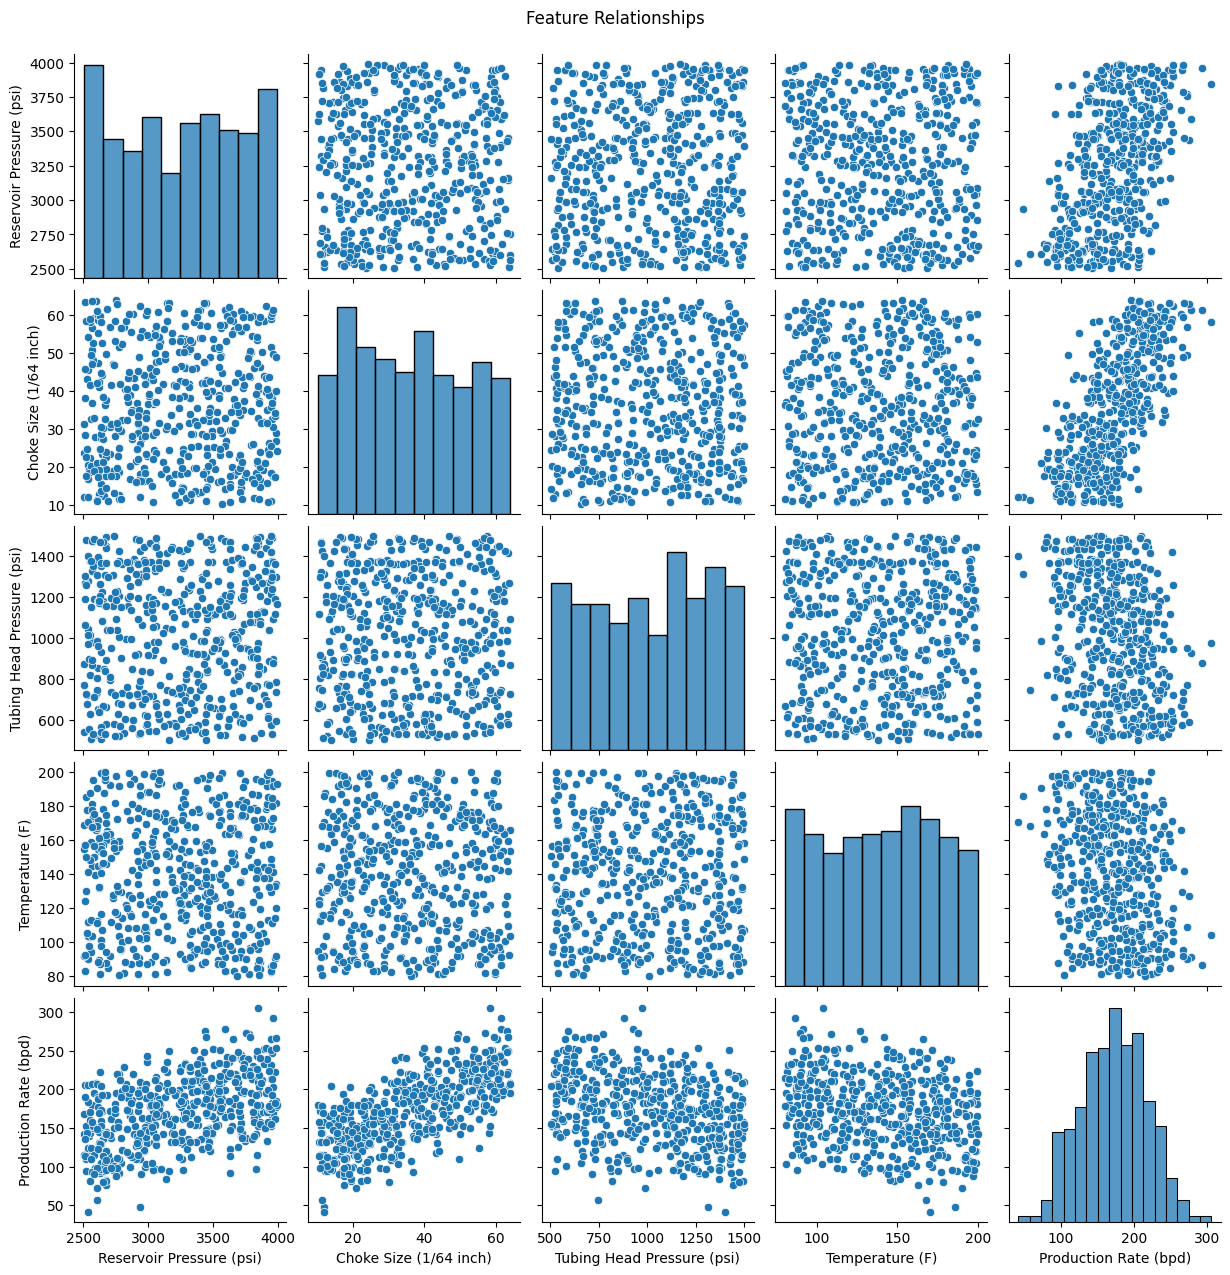


Number of training samples: 400
Number of testing samples: 100

Model Evaluation Metrics:
Mean Squared Error (MSE): 458.6029604000812
R-squared (R²): 0.7929896401517302


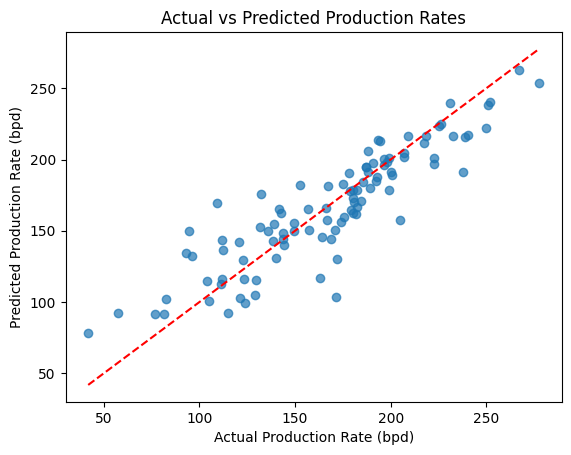

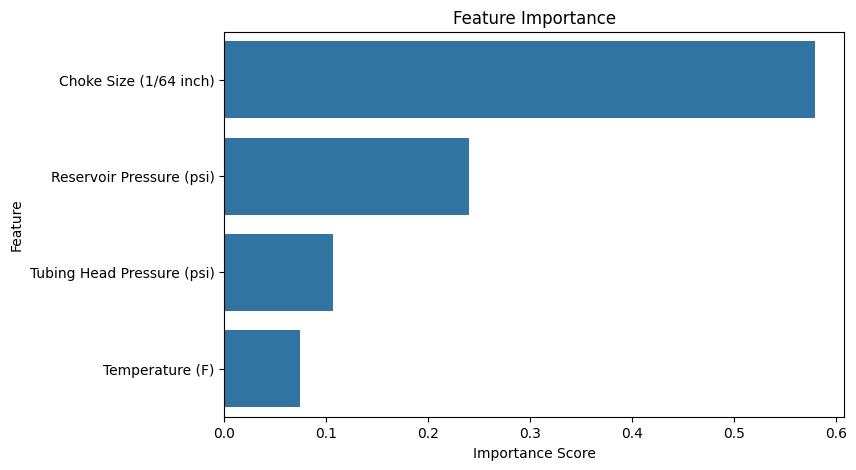

In [1]:
# Fundamentals of Python and Machine Learning Workshop
# Real-World ML Example: Predicting Oil Well Production Rate

# Step 1: Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Generating Synthetic Oil & Gas Data
np.random.seed(42)

# Create 500 synthetic wells
n_samples = 500

# Features (Reservoir and Surface Conditions)
reservoir_pressure = np.random.uniform(2500, 4000, n_samples)  # psi
choke_size = np.random.uniform(10, 64, n_samples)  # 1/64 inch
tubing_head_pressure = np.random.uniform(500, 1500, n_samples)  # psi
temperature = np.random.uniform(80, 200, n_samples)  # Fahrenheit

# Target: Production rate (simplified synthetic function + noise)
production_rate = (
    (reservoir_pressure - tubing_head_pressure) * 0.05 +
    choke_size * 2 -
    (temperature - 100) * 0.3 +
    np.random.normal(0, 15, n_samples)  # adding random noise
)

# Create a DataFrame
data = pd.DataFrame({
    'Reservoir Pressure (psi)': reservoir_pressure,
    'Choke Size (1/64 inch)': choke_size,
    'Tubing Head Pressure (psi)': tubing_head_pressure,
    'Temperature (F)': temperature,
    'Production Rate (bpd)': production_rate
})

# Step 3: Exploring the Data
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

# Step 4: Visualizing the Data
sns.pairplot(data)
plt.suptitle('Feature Relationships', y=1.02)
plt.show()

# Step 5: Feature Selection
features = ['Reservoir Pressure (psi)', 'Choke Size (1/64 inch)',
            'Tubing Head Pressure (psi)', 'Temperature (F)']
target = 'Production Rate (bpd)'

X = data[features]
y = data[target]

# Step 6: Splitting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nNumber of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))

# Step 7: Building the Machine Learning Model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Making Predictions
y_pred = model.predict(X_test)

# Step 9: Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Step 10: Visualizing Actual vs Predicted Production Rates
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs Predicted Production Rates')
plt.xlabel('Actual Production Rate (bpd)')
plt.ylabel('Predicted Production Rate (bpd)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal
plt.show()

# Step 11: Feature Importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()